# **Module** **3** **Assignment**: **Cleaning** ***“Messy”*** **Data** **-** **Wine Dataset**

# **1. Introduction**

The purpose of this assignment is to clean a dataset of over 12,700 wines that contains both data integrity and usability issues. The dataset includes variables on chemical compositions (e.g., acidity, pH, alcohol content), label appeal, expert ratings (STARS), and the response variable (TARGET), representing the number of wine cases sold.

In this notebook ,we will:


1.   Load and inspect the dataset
2.  Perform **Exploratory Data Analysis (EDA)** to detect missing values, outliers, skewness, and correlations.


1.   Summarize findings and identify transformations or imputations.
2.   In later steps, we will prepare the data and re-run EDA to validate improvements.





# **2. Exploratory Data Analysis**

## **2.1 Data Overview**

We begin by loading the dataset, assigning column names, and performing initial inspection to confirm structure and dimensionality.

In [65]:
import pandas as pd

# Load the dataset from the raw GitHub link
url = "https://raw.githubusercontent.com/saugat977/DAV-6150/refs/heads/main/M3/M3_Data.csv"
df = pd.read_csv(url, header=None)

print(df.shape)
df.head()


(12796, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1,1,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
2,2,3,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
3,4,5,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
4,5,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1


In [66]:
# sanity check - make sure data was read in as expected
df.head(9)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1,1,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
2,2,3,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
3,4,5,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
4,5,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1
5,6,4,8,0.33,-1.26,9.4,NaN,-167,108,0.99457,3.12,1.77,13.7,0,9,2
6,7,0,11.3,0.32,0.59,2.2,0.556,-37,15,0.9994,3.2,1.29,15.4,0,11,NaN
7,8,0,7.7,0.29,-0.4,21.5,0.06,287,156,0.99572,3.49,1.21,10.3,0,8,NaN
8,11,4,6.5,-1.22,0.34,1.4,0.04,523,551,1.03236,3.2,NaN,11.6,1,7,3


In [67]:
df.columns = [
    "INDEX", "TARGET", "FixedAcidity", "VolatileAcidity", "CitricAcid",
    "ResidualSugar", "Chlorides", "FreeSulfurDioxide", "TotalSulfurDioxide",
    "Density", "pH", "Sulphates", "Alcohol", "LabelAppeal", "AcidIndex", "STARS"
]


# Drop the first row
df = df.drop(index=0).reset_index(drop=True)

# Dropping INDEX as it is a unique identifier for a wine and not relevant/disposable for our project.
df.drop(columns=["INDEX"], inplace=True)


# Sanity check
print(df.shape)
df.head()

(12795, 15)


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
1,3,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
2,5,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
3,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1
4,4,8,0.33,-1.26,9.4,NaN,-167,108,0.99457,3.12,1.77,13.7,0,9,2


### **Findings**: The dataset has 12,795 rows and 16 columns.

## **2.2 Descriptive Statistics**

We compute summary statistics, including quartiles, standard deviation, skewness, and missingness.

In [68]:
import pandas as pd
import numpy as np

# Ensure numeric conversion where possible (invalid strings -> NaN)
df_numeric = df.apply(pd.to_numeric, errors="ignore")

# Describe only numeric columns
stats = df_numeric.describe(percentiles=[.25, .5, .75]).T

# Add median, IQR, missingness, skewness
stats["median"] = df_numeric.median(numeric_only=True)
stats["IQR"] = stats["75%"] - stats["25%"]
stats["missing_count"] = df_numeric.isnull().sum()
stats["missing_%"] = round(df_numeric.isnull().mean() * 100, 2)
stats["skewness"] = df_numeric.skew(numeric_only=True)

# Reorder for readability
stats = stats[["count","missing_count","missing_%","mean","median","std","min","25%","50%","75%","max","IQR","skewness"]]

stats


/tmp/ipython-input-2169764809.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors="ignore")


,count,missing_count,missing_%,mean,median,std,min,25%,50%,75%,max,IQR,skewness
TARGET,12795.0,0,0.00,3.029074,3.00000,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000,2.000000,-0.326378
FixedAcidity,12795.0,0,0.00,7.075717,6.90000,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000,4.300000,-0.022591
VolatileAcidity,12795.0,0,0.00,0.324104,0.28000,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000,0.510000,0.020385
CitricAcid,12795.0,0,0.00,0.308413,0.31000,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000,0.550000,-0.050319
ResidualSugar,12179.0,616,4.81,5.418733,3.90000,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000,17.900000,-0.053136
Chlorides,12157.0,638,4.99,0.054822,0.04600,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100,0.184000,0.030435
FreeSulfurDioxide,12148.0,647,5.06,30.845571,30.00000,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000,70.000000,0.006395
TotalSulfurDioxide,12113.0,682,5.33,120.714233,123.00000,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000,181.000000,-0.007181
Density,12795.0,0,0.00,0.994203,0.99449,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924,0.012795,-0.018698
pH,12400.0,395,3.09,3.207628,3.20000,0.679687,0.48000,2.96000,3.20000,3.470000,6.13000,0.510000,0.044299


### **Findings:**

Most variables are symmetric with mean ≈ median, but ResidualSugar, SulfurDioxide, and AcidIndex show high variability and extreme values. STARS has the highest missing data (\~26%), making it a critical variable to handle.


## **2.3 Univariate Analysis**



### **2.3.1 Histograms**

Histograms show the frequency distribution of numeric variables.

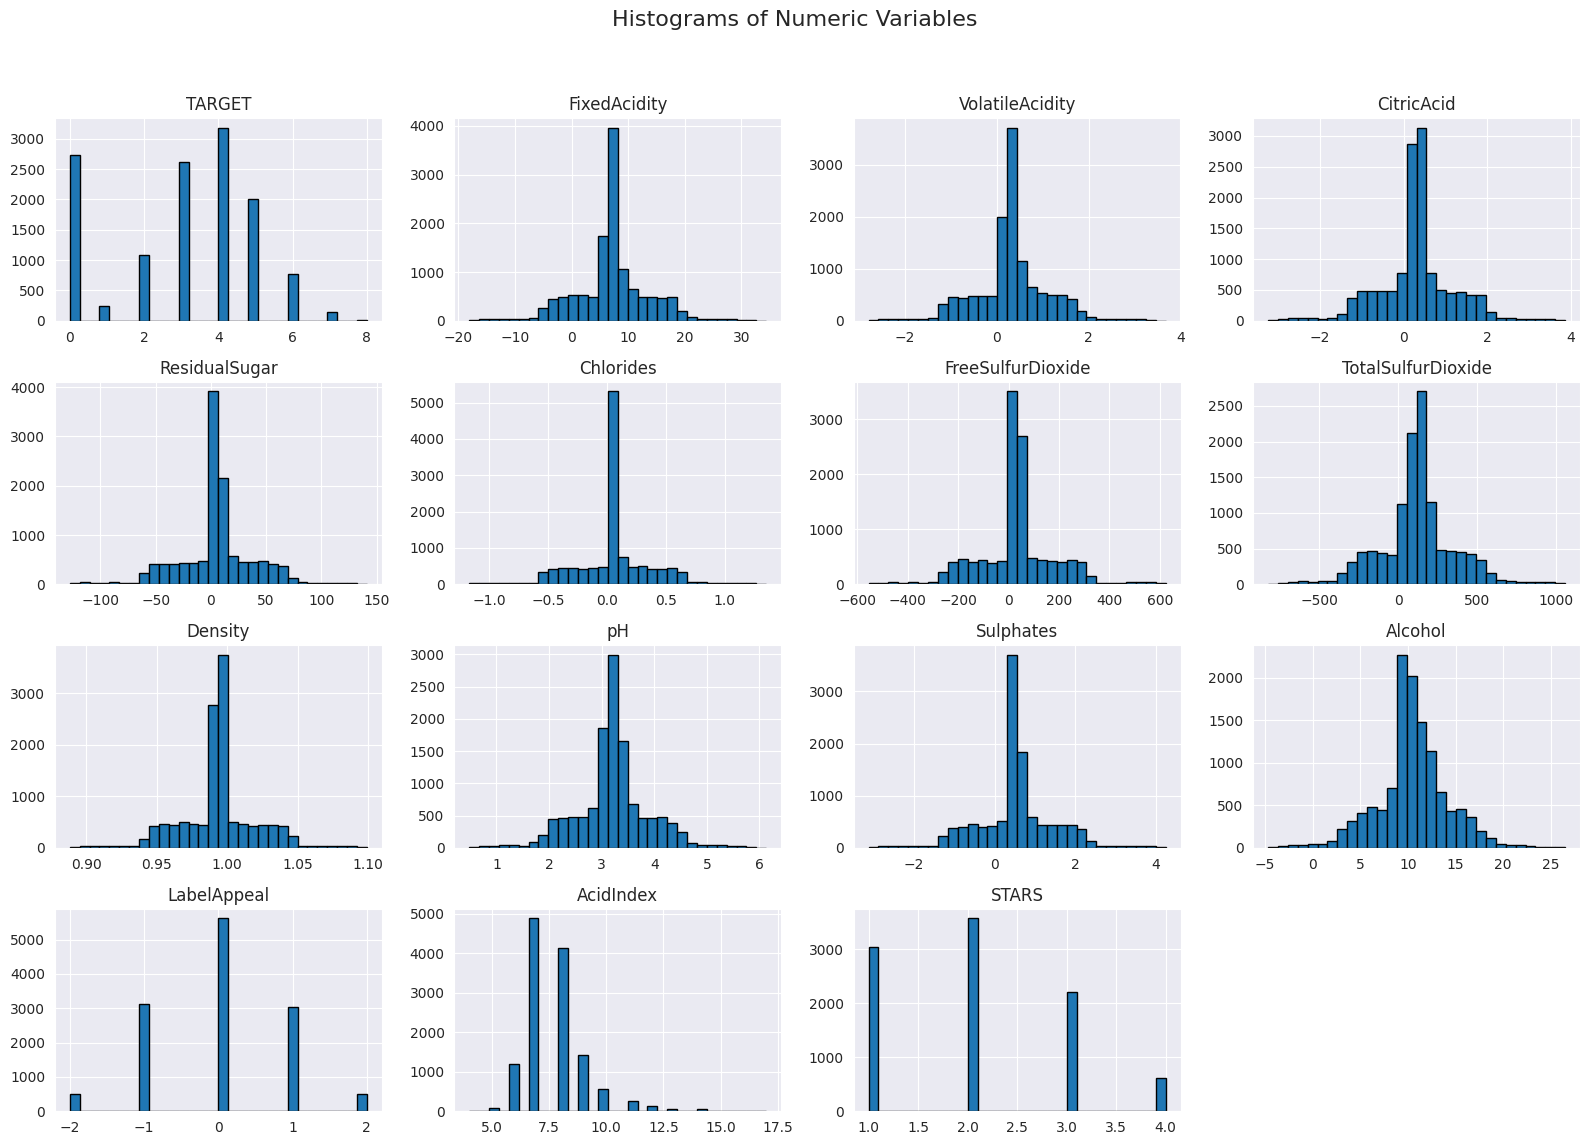

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert numeric-looking columns to numeric
df_num = df.apply(pd.to_numeric, errors="coerce")

# Drop non-numeric columns (if any)
num_cols = df_num.select_dtypes(include=["int64","float64"]).columns

# Histograms
df_num[num_cols].hist(bins=30, figsize=(16,12), edgecolor="black")
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **Findings:**

Since the dataset has many variables, We started with histograms to check the frequency distribution before moving to boxplots. This gave us a quick overview of how the data is spread and where issues might exist.

**Key takeaways:**


*  Some variables are roughly normal (FixedAcidity, pH, Alcohol).

*   Others show heavy tails/outliers (ResidualSugar, Chlorides, SulfurDioxide).
*   A few numeric columns are actually categorical (LabelAppeal, STARS, Target).


*   Some features contain negative values that don’t make sense (CitricAcid, Sulfur compounds).

*   Target variable shows class imbalance.

### **2.3.2 Skewness Graphs**

Skewness measures the symmetry of a distribution, showing whether data is balanced, left-skewed, or right-skewed.

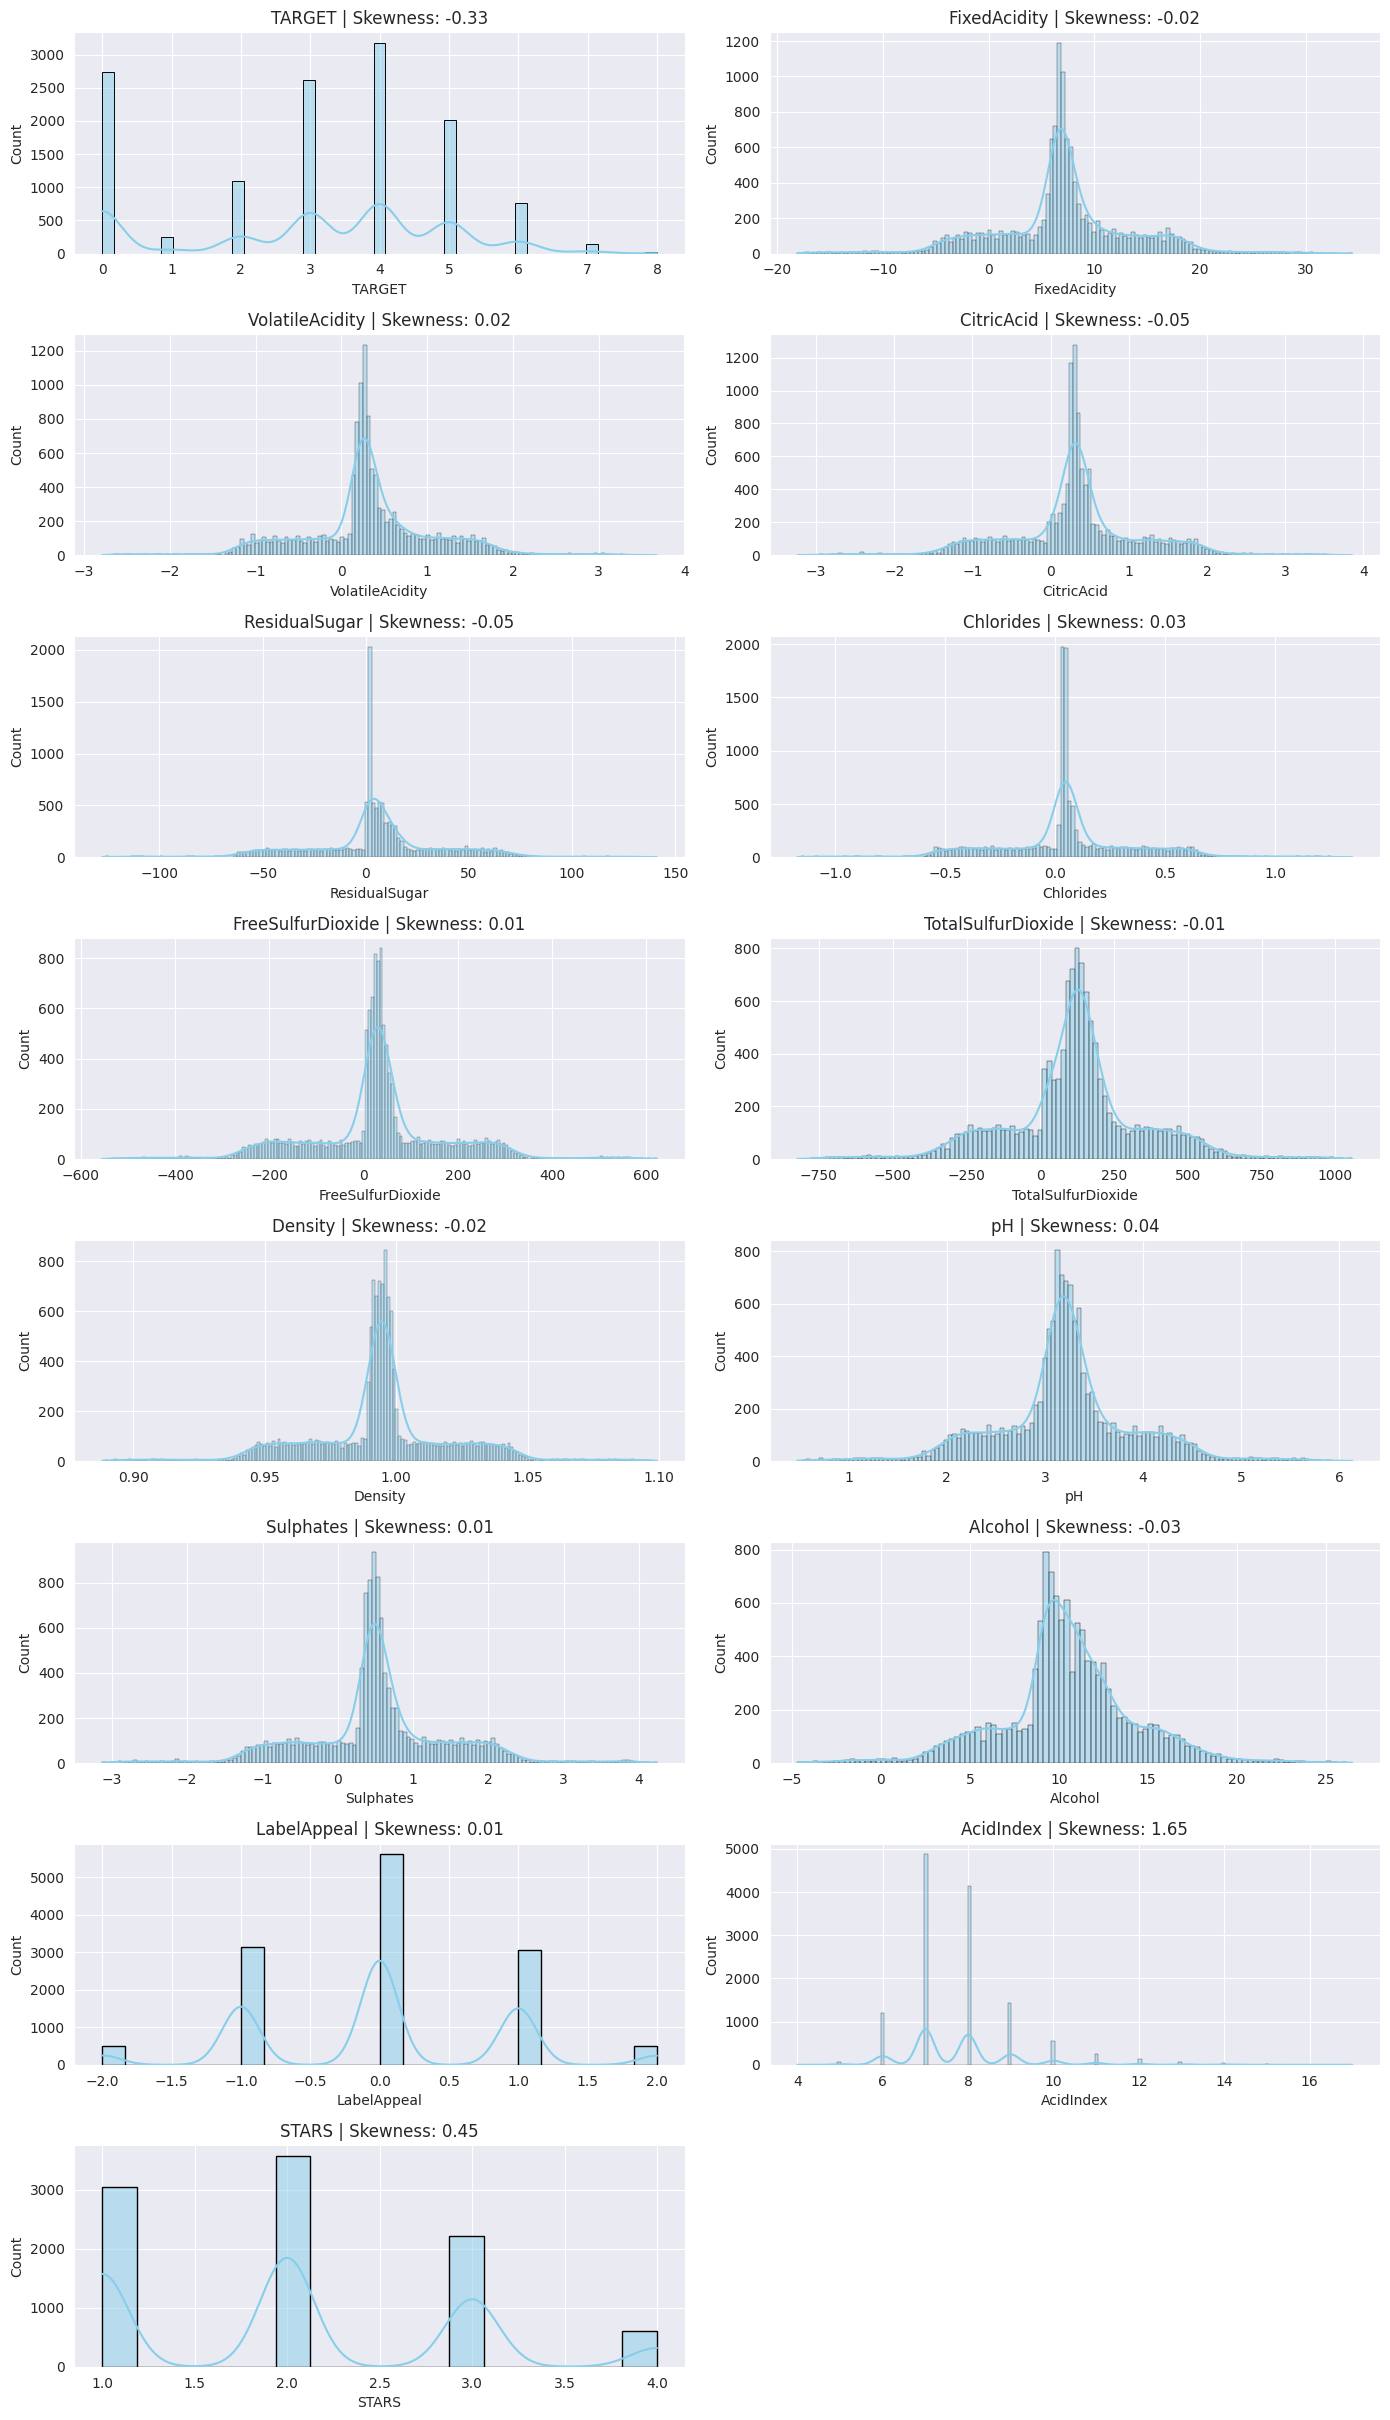

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert numeric-looking columns to numeric
df_num = df.apply(pd.to_numeric, errors="coerce")

# Select numeric columns only
num_cols = df_num.select_dtypes(include=["int64","float64"]).columns

# Set style
sns.set_style("darkgrid")

# Plot histograms with KDE + skewness
plt.figure(figsize=(14, len(num_cols) * 3))

for idx, feature in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, idx)  # 2 plots per row
    sns.histplot(df_num[feature].dropna(), kde=True, color="skyblue", edgecolor="black")
    skew_val = round(df_num[feature].skew(), 2)
    plt.title(f"{feature} | Skewness: {skew_val}")

plt.tight_layout()
plt.show()


### **Findings:**


* Most variables (FixedAcidity, VolatileAcidity, pH, Alcohol, etc.) show low
skewness and are close to normal.
* AcidIndex has strong positive skew, while STARS shows mild positive skew.

* Target and INDEX are negatively skewed, though these are categorical/ID-like.

* Skewness analysis confirms that a few features may need transformation or scaling before modeling.

### **2.3.3 Boxplots**
 Boxplots display the spread of data, highlighting the median, quartiles, and potential outliers.

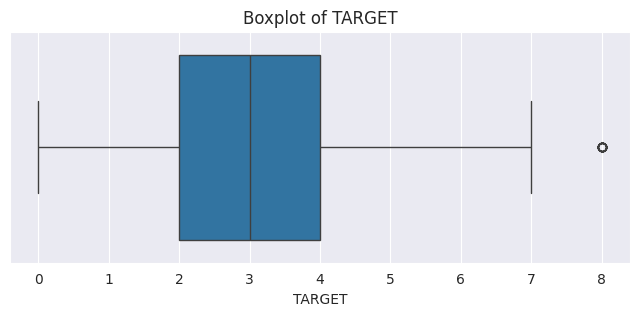

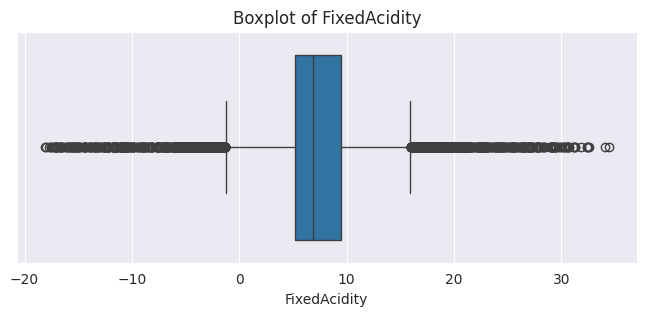

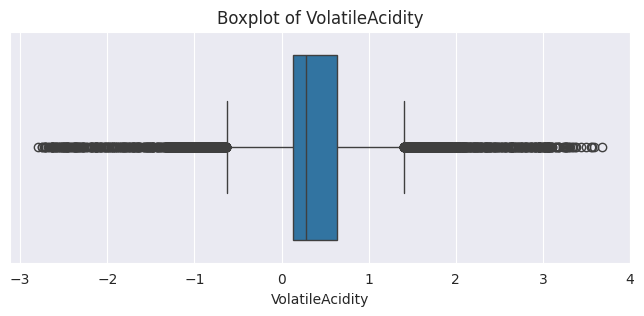

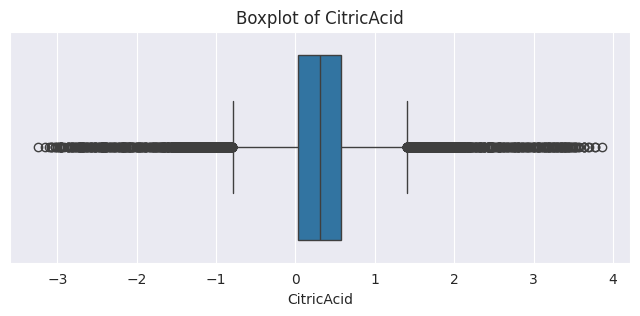

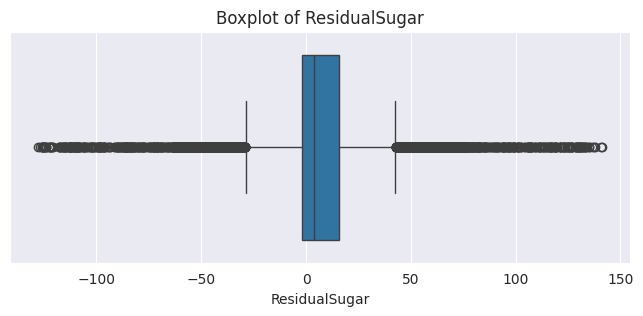

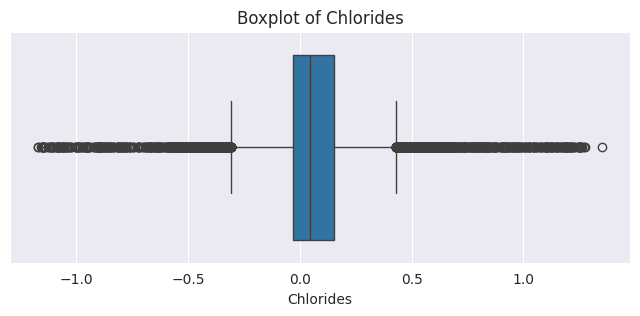

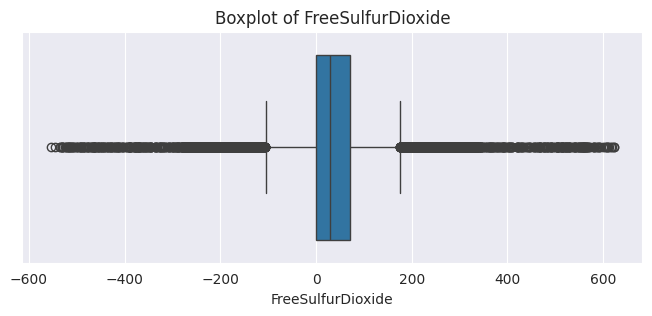

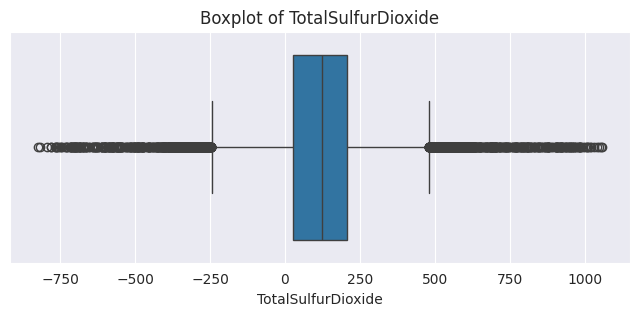

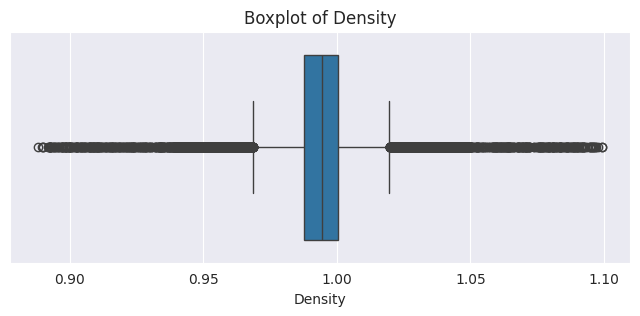

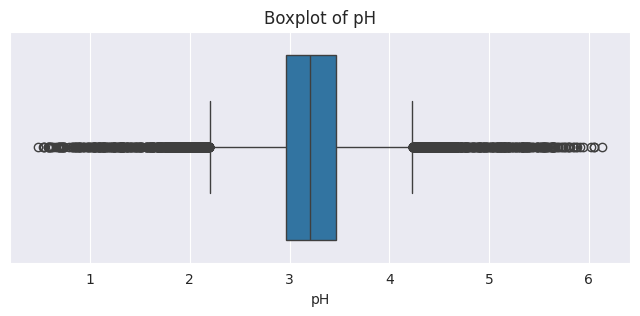

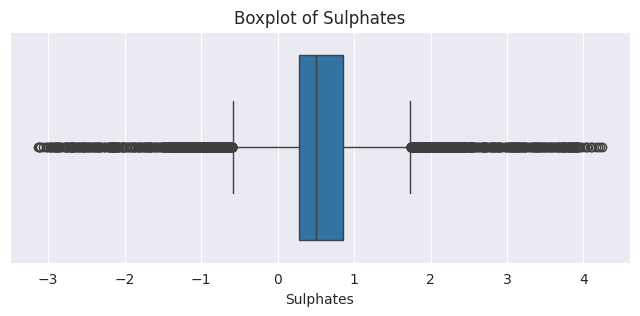

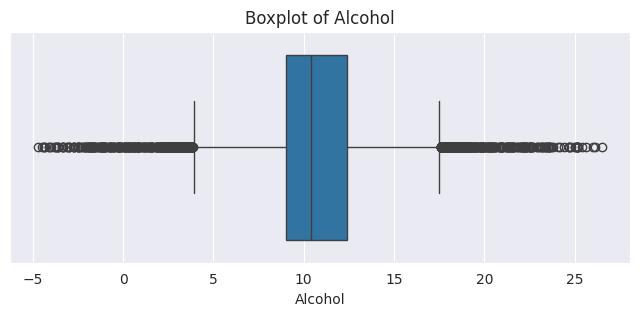

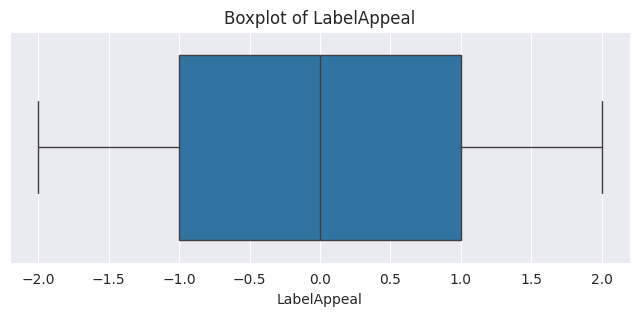

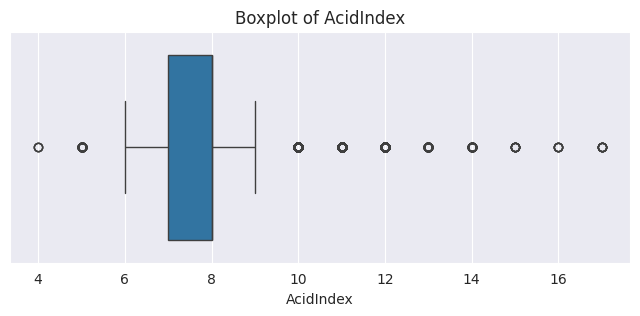

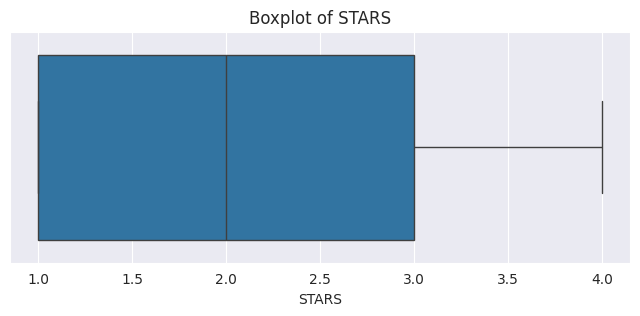

In [71]:
for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df_num[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Findings**


*  Many features (ResidualSugar, SulfurDioxide, Chlorides, Alcohol) show a large number of outliers.


*   Some variables have a tight distribution with few outliers (Density, pH).

*   Target and categorical-like variables (LabelAppeal, STARS) show discrete box structures.

*   Negative values are again visible in some features, confirming possible data quality issues.

**Overall, the data has high variability and outliers, which need handling before modeling.**

###**2.3.4 Count plots**

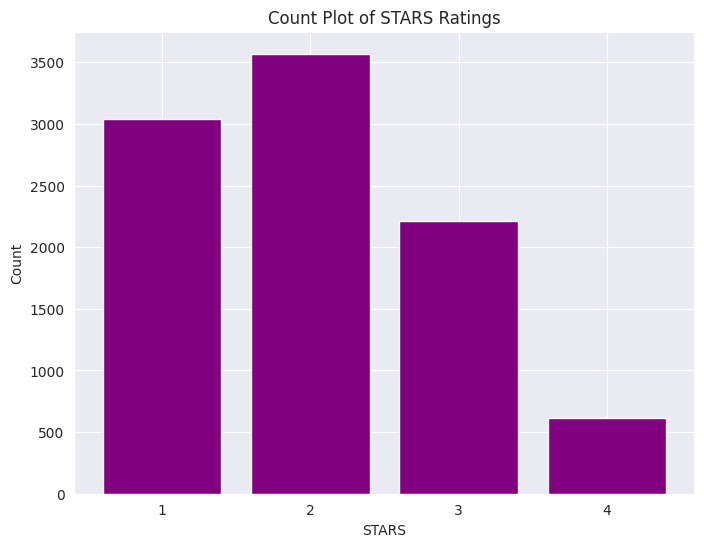

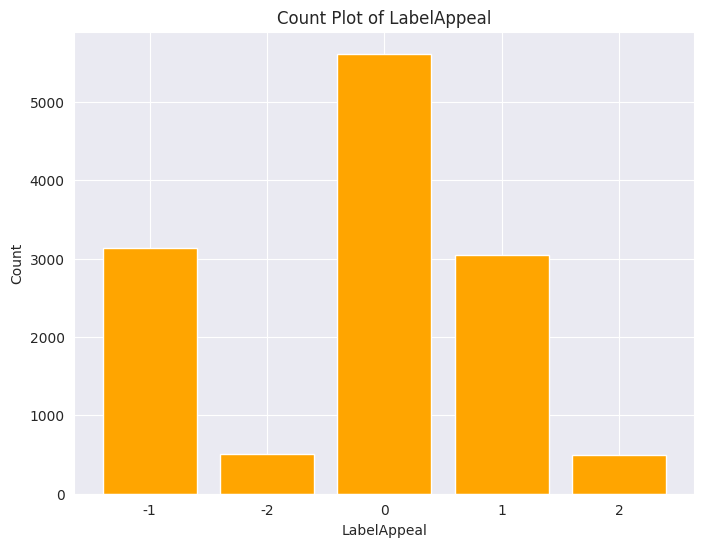

In [72]:
stars_counts = df["STARS"].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.bar(stars_counts.index, stars_counts, color="purple")
plt.title("Count Plot of STARS Ratings")
plt.xlabel("STARS")
plt.ylabel("Count")
plt.show()


appeal_counts = df["LabelAppeal"].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.bar(appeal_counts.index, appeal_counts, color="orange")
plt.title("Count Plot of LabelAppeal")
plt.xlabel("LabelAppeal")
plt.ylabel("Count")
plt.show()


### **Findings:**  
Count plots showed the distribution of categorical variables. Most wines have a LabelAppeal of 0 and STARS ratings of 1 or 2, with fewer in higher categories.

###**2.3.5 Correlation Heatmap**
 A correlation heatmap shows the strength and direction of linear relationships between variables. Values range from -1 (negative correlation) to +1 (positive correlation), with 0 meaning no correlation.

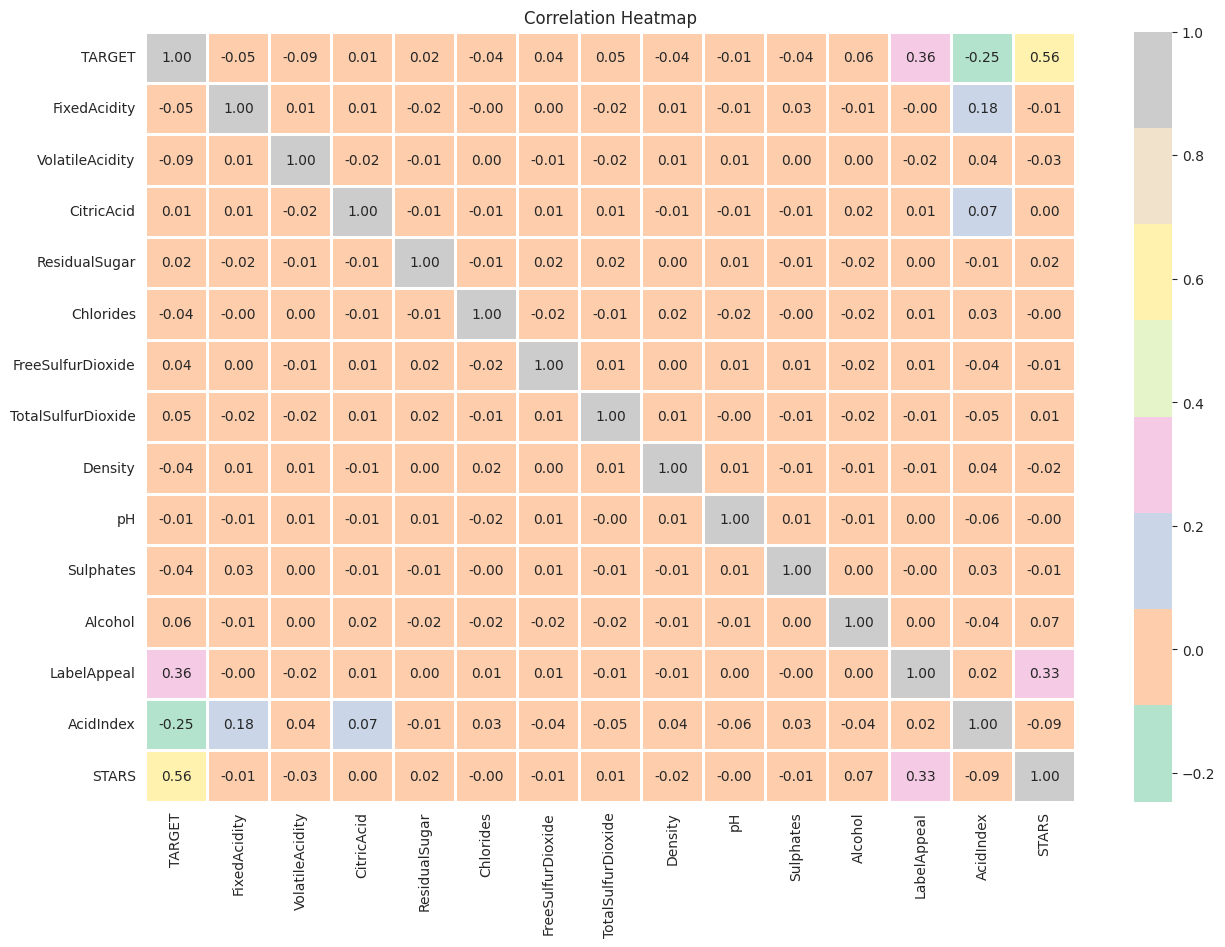

In [73]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### **Findings:**



*   TARGET is strongly correlated with STARS (0.56) and moderately with LabelAppeal (0.36).

*   AcidIndex has a negative relation with TARGET (-0.25).

*   Most numeric features show very weak correlations with each other.

##**2.4 Missing Values Summary**

In [74]:
# Missing values summary
missing = pd.DataFrame({
    "Missing_Count": df.isnull().sum(),
    "Missing_%": df.isnull().mean()*100
}).sort_values("Missing_%", ascending=False)
missing


,Missing_Count,Missing_%
STARS,3359,26.252442
Sulphates,1210,9.456819
TotalSulfurDioxide,682,5.330207
Alcohol,653,5.103556
FreeSulfurDioxide,647,5.056663
Chlorides,638,4.986323
ResidualSugar,616,4.814381
pH,395,3.087143
TARGET,0,0.000000
FixedAcidity,0,0.000000


### **Findings:**



*   STARS has the highest missing values (~26%), making it a major concern.


*   Sulphates (9%) and a few chemical measures (~5%) also have notable gaps.



##**EDA Summary**


EDA showed most variables are fairly symmetric, but a few (ResidualSugar, SulfurDioxide, AcidIndex) have extreme values and skewness. Boxplots confirmed many outliers, while count plots revealed imbalance in STARS and LabelAppeal. Correlation heatmap highlighted strong links of TARGET with STARS and LabelAppeal, and missing values were highest in STARS (\~26%).

Based on these insights, the next step is **data preparation** to handle missing values, outliers, and scaling.



In [81]:
# seperating response and explanatory variable
X = df.drop(columns=['TARGET'], errors='ignore')
y = df['TARGET']


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
1,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
2,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1
4,8,0.33,-1.26,9.4,NaN,-167,108,0.99457,3.12,1.77,13.7,0,9,2


In [92]:
cols_to_clean = [
    'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
    'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
    'Sulphates', 'Alcohol'
]

# Convert to numeric and replace negative values with NaN
for col in cols_to_clean:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    X.loc[X[col] < 0, col] = np.nan

# Check column types
print(X.dtypes)

FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density                object
pH                     object
Sulphates             float64
Alcohol               float64
LabelAppeal            object
AcidIndex              object
STARS                  object
dtype: object


In [93]:
# In the code below we're imputing the missing data. We're applying mode imputation for categorical data and median imputation for numeric.
for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna(X[col].mode()[0], inplace=True)
    elif col == 'STARS':
        X[col].fillna(X[col].mode()[0], inplace=True)
    else:
        X[col].fillna(X[col].median(), inplace=True)

/tmp/ipython-input-2971602318.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipython-input-2971602318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [94]:
X.isnull().sum()

,0
FixedAcidity,0
VolatileAcidity,0
CitricAcid,0
ResidualSugar,0
Chlorides,0
FreeSulfurDioxide,0
TotalSulfurDioxide,0
Density,0
pH,0
Sulphates,0


In [95]:
numeric_cols = X.select_dtypes(include=np.number).columns

if len(numeric_cols) == 0:
    print("No numeric columns available for summary.")
else:
    stats = X[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
    stats["median"] = X[numeric_cols].median()
    stats["IQR"] = X[numeric_cols].quantile(0.75) - X[numeric_cols].quantile(0.25)
    stats["missing_count"] = X[numeric_cols].isnull().sum()
    stats["missing_%"] = (X[numeric_cols].isnull().mean() * 100).round(2)
    stats["skewness"] = X[numeric_cols].skew()
    print(stats)

print(X.dtypes)


                      count        mean         std  min      25%      50%  \
FixedAcidity        12795.0    8.481653    4.577840  0.0    6.400    7.200   
VolatileAcidity     12795.0    0.562135    0.509188  0.0    0.270    0.360   
CitricAcid          12795.0    0.587769    0.542685  0.0    0.300    0.390   
ResidualSugar       12795.0   15.679472   20.880731  0.0    2.800    7.800   
Chlorides           12795.0    0.147812    0.200511  0.0    0.044    0.057   
FreeSulfurDioxide   12795.0   76.242868   92.099618  0.0   29.000   40.000   
TotalSulfurDioxide  12795.0  188.306565  147.528742  0.0  116.000  142.000   
Sulphates           12795.0    0.768860    0.589470  0.0    0.490    0.540   
Alcohol             12795.0   10.544104    3.441572  0.0    9.100   10.200   

                        75%       max   median     IQR  missing_count  \
FixedAcidity          9.500    34.400    7.200   3.100              0   
VolatileAcidity       0.640     3.680    0.360   0.370              0   


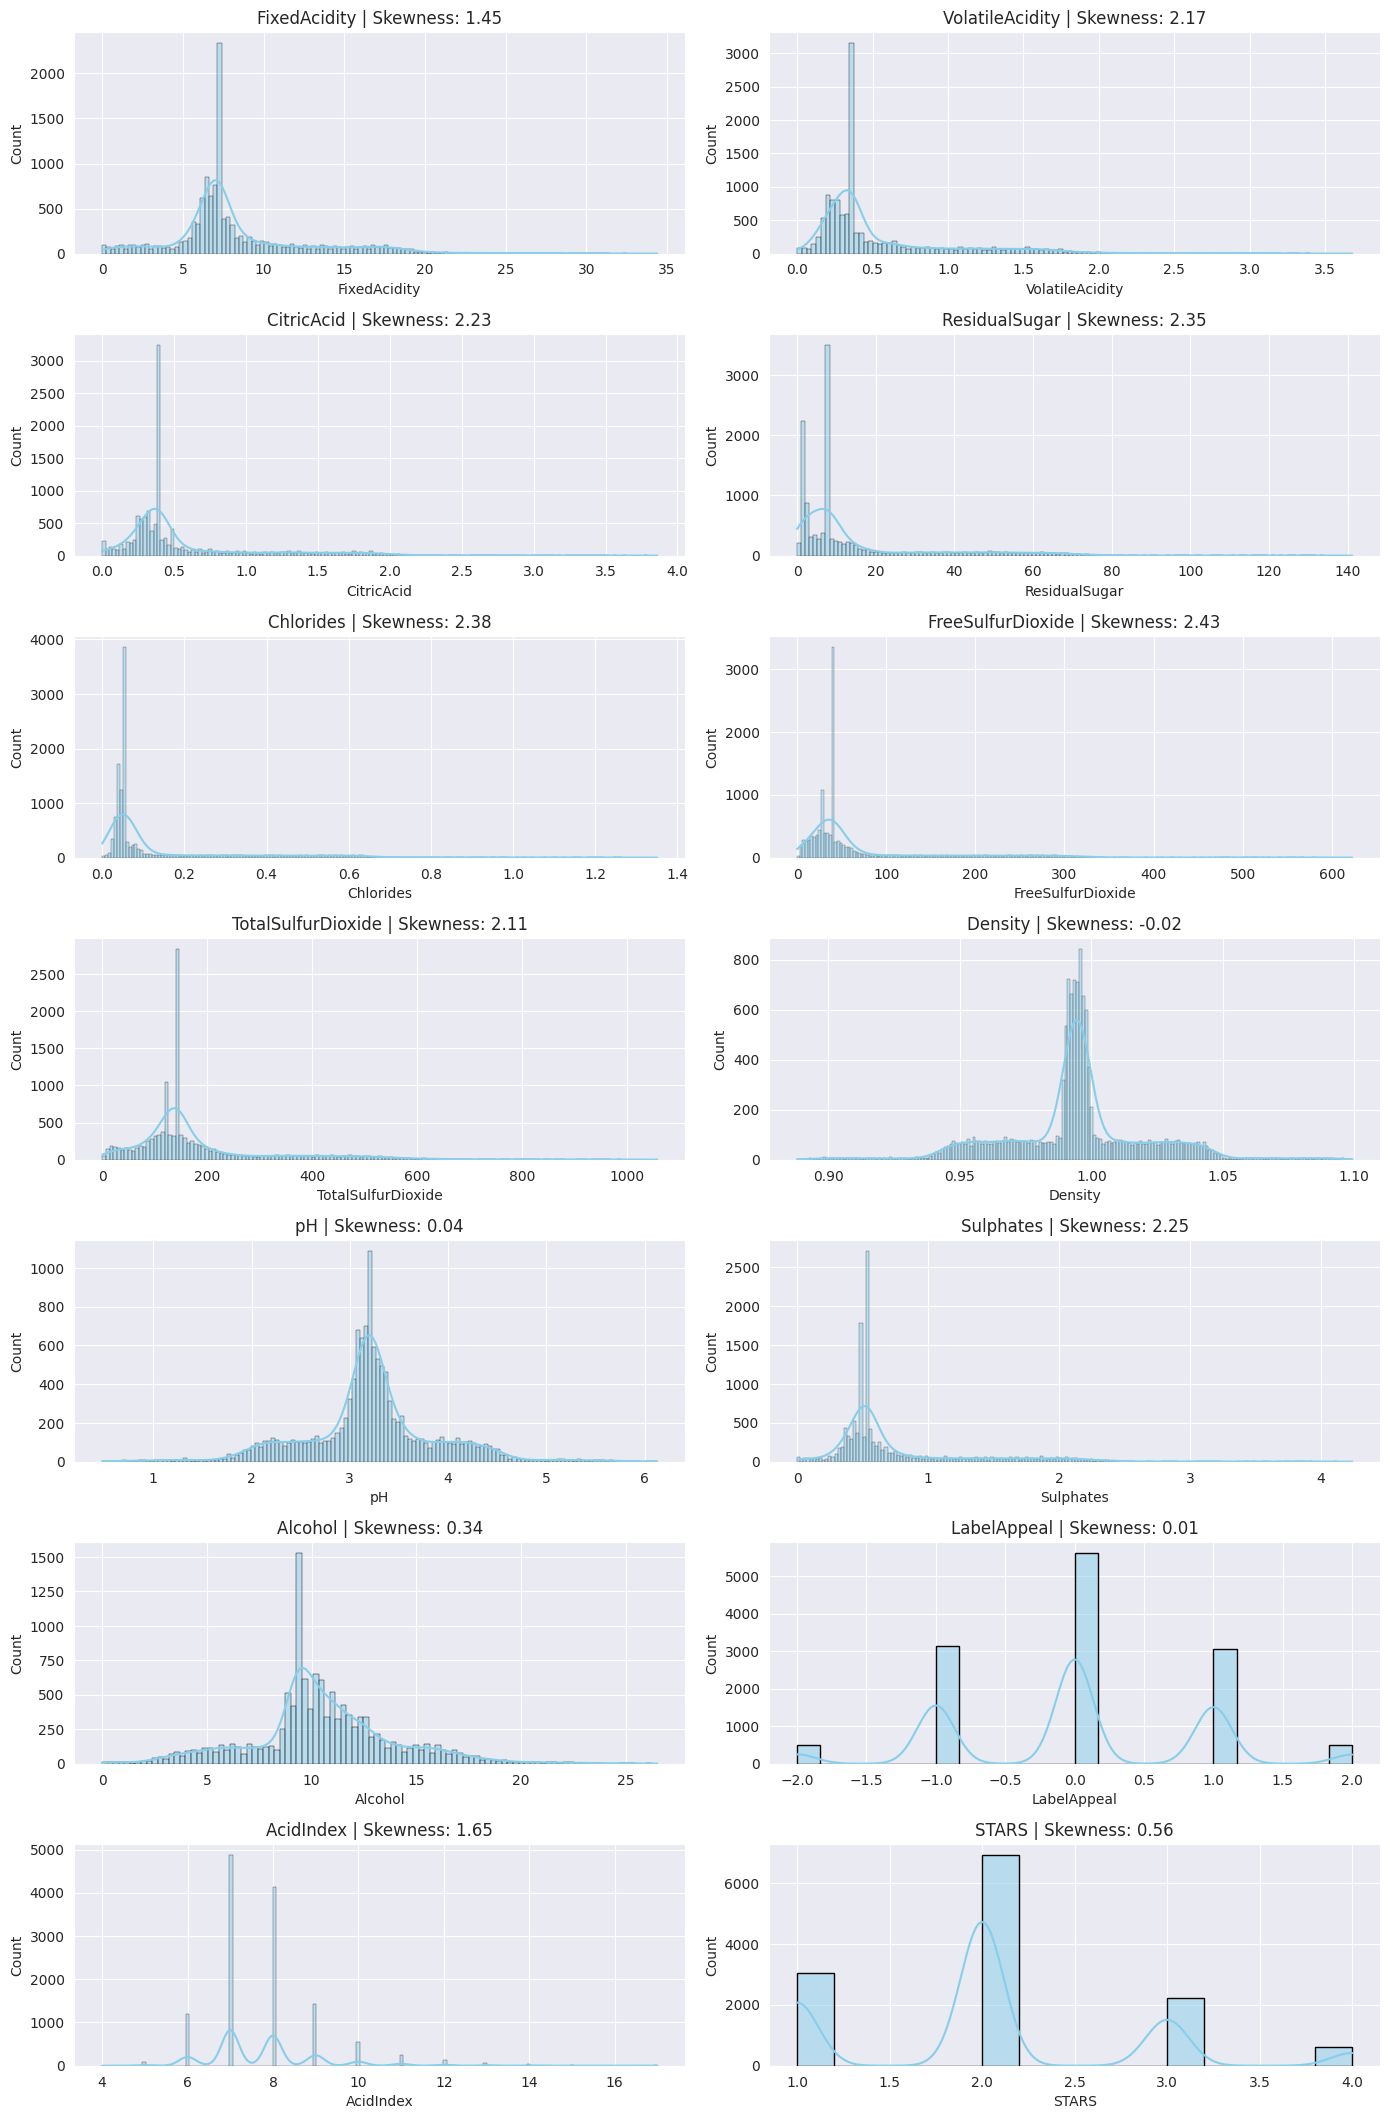

In [101]:
# Convert numeric-looking columns to numeric
df_num = X.apply(pd.to_numeric, errors="coerce")

# Select numeric columns only
num_cols = df_num.select_dtypes(include=["int64","float64"]).columns

# Set style
sns.set_style("darkgrid")

# Plot histograms with KDE + skewness
plt.figure(figsize=(14, len(num_cols) * 3))

for idx, feature in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, idx)  # 2 plots per row
    sns.histplot(df_num[feature].dropna(), kde=True, color="skyblue", edgecolor="black")
    skew_val = round(df_num[feature].skew(), 2)
    plt.title(f"{feature} | Skewness: {skew_val}")

plt.tight_layout()
plt.show()

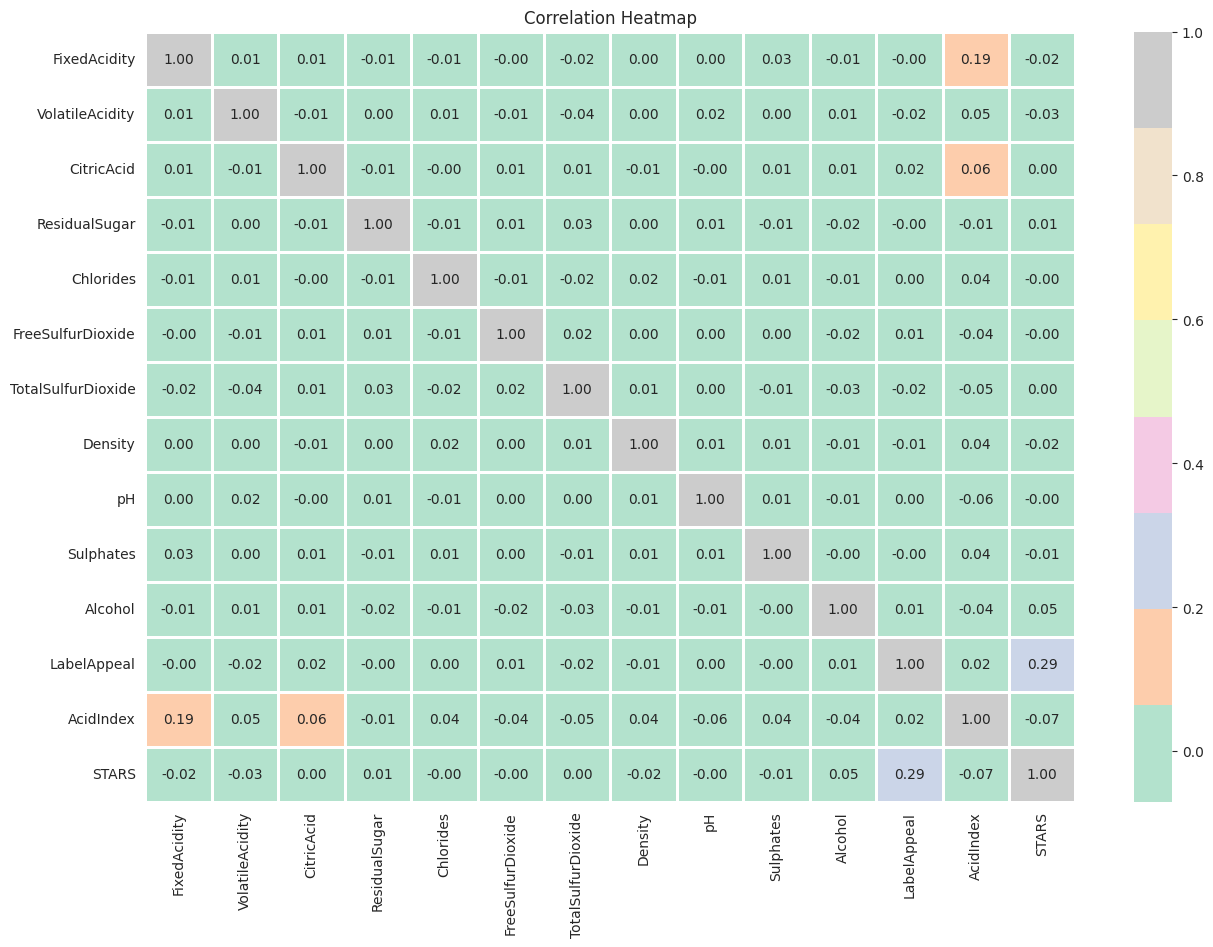

In [102]:
plt.figure(figsize=(15, 10))

sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()